# Insper
## Programa Avançado em Data Science e Decisão do Insper 
### Métodos de Design para Ciência de Dados 

- Rodrigo França
- Marcus Vinicius Pompeu
- Vinicius Vargas
- Cristian Favaro


# Entrevista
Roteiro para a entrevista com o scout Felipe Tricate S. Malta, scout do Houston Dynamo & Sports Management Teacher. 

### Roteiro de Perguntas
<ol>
    <li>Nome: </li>
    <li>Idade: </li>
    <li>Formação: </li>
    <li>Qual sua relação com o esporte e como chegou nesta área profissionalmente? </li>
    <li>Qual a trilha de formação de um scout? </li>
    <li>Qual a principal diferença no trabalho em outros países? </li>
    <li>Qual a sua rotina de trabalho? Quais as principais tarefas e quais tomam mais tempo? </li>
    <li>Qual o maior desafio de ser um scout? </li>
    <li>Você usa dados nas suas análises? São dados estruturados? </li>
    <li>Quais informações são mais importantes? (ideia aqui é explorar variáveis que pensamos ser úteis nos modelos, como geografia, altura, peso, etc) </li>
    <li>Quais os pesos dessas variáveis? O que é mais importante? </li>
    <li>O que é o "feijão com arroz" do seu trabalho? Qual é o diferencial? </li>
    <li>Hoje você ou o seu clube usam alguma linguagem de programação para tomar decisões como scout? Há alguma ferramenta hoje no mercado que ajuda você de alguma forma? </li>
    <li>O que costuma ser mais decisivo para definir o sucesso ou falha na contratação de um profissional? </li>
    <li>Como foi o processo da indicação de mais sucesso feita por você? </li>
    <li>Imaginamos que três fatores são avaliados de perto por um scout: Quais partidas você costuma decidir assistir? Quais atletas você escolhe focar e como é o processo? E que você costuma levar em consideração? </li>
    <li>Como é a relação de vocês com agentes dos atletas e qual o peso deles nas decisões? </li>
</ol>

# Persona 
Nome: Digão <br>
Cargo: Scout 

### Negative Trends
Muitas vezes um jogador muito bom tecnicamente acaba não vingando por causa de uma fraca estrutura emocional - que leva, por exemplo, a um corporamento ruim em campo e falta de foco na carreira. 

### Positive Trends
Com técinicas refinadas e agilidade, o scout consegue identificar bons atletas antes de clubes concorrente e fazer negócios. 

### Opportunities
Uma das principais oportunidades do scout e que ainda é pouco explorada é a estabilidade emocional dos atletas. Uma melhor avaliaçao desta categoria poderia jogar o scout a um terreno com boas oportunidades. 

### Hopes
Mecanismos para aumentar a objetividade na seleção, assim como métodos e ferramentas para cortar etapas do trabalho. 

### Fears
Muitas vezes uma contratação não vinga. 

### Headaches
O procesos de seleção é bastante longo e subjetivo. Inicialmente ele precisa mapear os atletas, fazer filtros para só depois escoleher quais jogos serão acompanhados in loco - em que muitas características não presentes nas transmissões podem ser avaliadas (como o comportamento sem a posse de bola). 

### Need
Ténicas para melhorar a avaliaçao dos atletas e tornas mais rápido o processo de seleção, sobretudo com ferramentas guiadas por dados. 



# How might we?
Como podemos ajudar Digão (nosso Scout) a melhor avaliar as oportunidades de contratação baseada na estrutura emocional do atleta. 


# Análise exploratória 

- Quais bases usamos além da do professor? Tem de por aqui

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
file_names = ["Country.csv", "League.csv", "Match.csv", "Player.csv", "Player_Attributes.csv",
              "Team.csv", "Team_Attributes.csv"]

#"sqlite_sequence.csv"

data_frames = {}  # Dictionary to store the DataFrames

for file_name in file_names:
    file_path = r"C:\Users\Rodrigo\Desktop\Pós Insper\Metodos de Design para Ciência de Dados\Projeto\\" + file_name
    df = pd.read_csv(file_path)
    data_frames[file_name] = df

# Access the DataFrames using their respective file names
country_df = data_frames["Country.csv"]
league_df = data_frames["League.csv"]
match_df = data_frames["Match.csv"]
player_df = data_frames["Player.csv"]
player_attr_df = data_frames["Player_Attributes.csv"]
#sqlite_sequence_df = data_frames["sqlite_sequence.csv"]
team_df = data_frames["Team.csv"]
team_attr_df = data_frames["Team_Attributes.csv"]


In [3]:
# Print the column names from all files
for df_name, df in data_frames.items():
    print(f"Column names in {df_name}:")
    for column_name in df.columns:
        print(column_name)
    print()


Column names in Country.csv:
id
name

Column names in League.csv:
id
country_id
name

Column names in Match.csv:
id
country_id
league_id
season
stage
date
match_api_id
home_team_api_id
away_team_api_id
home_team_goal
away_team_goal
home_player_X1
home_player_X2
home_player_X3
home_player_X4
home_player_X5
home_player_X6
home_player_X7
home_player_X8
home_player_X9
home_player_X10
home_player_X11
away_player_X1
away_player_X2
away_player_X3
away_player_X4
away_player_X5
away_player_X6
away_player_X7
away_player_X8
away_player_X9
away_player_X10
away_player_X11
home_player_Y1
home_player_Y2
home_player_Y3
home_player_Y4
home_player_Y5
home_player_Y6
home_player_Y7
home_player_Y8
home_player_Y9
home_player_Y10
home_player_Y11
away_player_Y1
away_player_Y2
away_player_Y3
away_player_Y4
away_player_Y5
away_player_Y6
away_player_Y7
away_player_Y8
away_player_Y9
away_player_Y10
away_player_Y11
home_player_1
home_player_2
home_player_3
home_player_4
home_player_5
home_player_6
home_player_7
ho

In [4]:
League = league_df.merge(country_df, on='id')
League = league_df.merge(country_df, on='id', suffixes=('_League', '_Country'))
League.rename(columns={'name_League': 'League Name', 'name_Country': 'Country'}, inplace=True)
League

,id,country_id,League Name,Country
0,1,1,Belgium Jupiler League,Belgium
1,1729,1729,England Premier League,England
2,4769,4769,France Ligue 1,France
3,7809,7809,Germany 1. Bundesliga,Germany
4,10257,10257,Italy Serie A,Italy
5,13274,13274,Netherlands Eredivisie,Netherlands
6,15722,15722,Poland Ekstraklasa,Poland
7,17642,17642,Portugal Liga ZON Sagres,Portugal
8,19694,19694,Scotland Premier League,Scotland
9,21518,21518,Spain LIGA BBVA,Spain


In [5]:
League = League.merge(match_df, on='country_id')
League

,id_x,country_id,League Name,Country,id_y,league_id,season,stage,date,match_api_id,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,Belgium Jupiler League,Belgium,1,1,2008/2009,1,2008-08-17 00:00:00,492473,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,1,1,Belgium Jupiler League,Belgium,2,1,2008/2009,1,2008-08-16 00:00:00,492474,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,1,1,Belgium Jupiler League,Belgium,3,1,2008/2009,1,2008-08-16 00:00:00,492475,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,1,1,Belgium Jupiler League,Belgium,4,1,2008/2009,1,2008-08-17 00:00:00,492476,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,1,1,Belgium Jupiler League,Belgium,5,1,2008/2009,1,2008-08-16 00:00:00,492477,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,24558,24558,Switzerland Super League,Switzerland,25975,24558,2015/2016,9,2015-09-22 00:00:00,1992091,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25975,24558,24558,Switzerland Super League,Switzerland,25976,24558,2015/2016,9,2015-09-23 00:00:00,1992092,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25976,24558,24558,Switzerland Super League,Switzerland,25977,24558,2015/2016,9,2015-09-23 00:00:00,1992093,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25977,24558,24558,Switzerland Super League,Switzerland,25978,24558,2015/2016,9,2015-09-22 00:00:00,1992094,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
list(League.columns)

['id_x',
 'country_id',
 'League Name',
 'Country',
 'id_y',
 'league_id',
 'season',
 'stage',
 'date',
 'match_api_id',
 'home_team_api_id',
 'away_team_api_id',
 'home_team_goal',
 'away_team_goal',
 'home_player_X1',
 'home_player_X2',
 'home_player_X3',
 'home_player_X4',
 'home_player_X5',
 'home_player_X6',
 'home_player_X7',
 'home_player_X8',
 'home_player_X9',
 'home_player_X10',
 'home_player_X11',
 'away_player_X1',
 'away_player_X2',
 'away_player_X3',
 'away_player_X4',
 'away_player_X5',
 'away_player_X6',
 'away_player_X7',
 'away_player_X8',
 'away_player_X9',
 'away_player_X10',
 'away_player_X11',
 'home_player_Y1',
 'home_player_Y2',
 'home_player_Y3',
 'home_player_Y4',
 'home_player_Y5',
 'home_player_Y6',
 'home_player_Y7',
 'home_player_Y8',
 'home_player_Y9',
 'home_player_Y10',
 'home_player_Y11',
 'away_player_Y1',
 'away_player_Y2',
 'away_player_Y3',
 'away_player_Y4',
 'away_player_Y5',
 'away_player_Y6',
 'away_player_Y7',
 'away_player_Y8',
 'away_player

In [7]:
Players = player_df.merge(player_attr_df, on=['player_api_id', 'player_fifa_api_id'])
Players

,id_x,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,id_y,date,overall_rating,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,1,2016-02-18 00:00:00,67.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,2,2015-11-19 00:00:00,67.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,3,2015-09-21 00:00:00,62.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,4,2015-03-20 00:00:00,61.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,5,2007-02-22 00:00:00,61.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183761,11075,39902,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176,183974,2009-08-30 00:00:00,83.0,...,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0
183762,11075,39902,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176,183975,2009-02-22 00:00:00,78.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183763,11075,39902,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176,183976,2008-08-30 00:00:00,77.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183764,11075,39902,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176,183977,2007-08-30 00:00:00,78.0,...,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0


In [8]:
import pandas as pd

# Assuming you have a DataFrame named "players_df" with a column named "date"
# Replace "players_df" with the actual name of your DataFrame

# Convert the "date" column to datetime if it's not already in datetime format
Players['date'] = pd.to_datetime(Players['date'])

# Find the earliest and latest dates
earliest_date = Players['date'].min()
latest_date = Players['date'].max()

print("Earliest date:", earliest_date)
print("Latest date:", latest_date)


Earliest date: 2007-02-22 00:00:00
Latest date: 2016-07-07 00:00:00


In [9]:
Players1 = Players[['attacking_work_rate', 'defensive_work_rate']]
Players1

,attacking_work_rate,defensive_work_rate
0,medium,medium
1,medium,medium
2,medium,medium
3,medium,medium
4,medium,medium
...,...,...
183761,medium,low
183762,medium,low
183763,medium,low
183764,medium,low


In [10]:
Players['weight_kg'] = Players['weight'] * 0.453592
Players = Players.drop('weight', axis=1)


In [11]:
# Convert the 'date' column to the corresponding season format
Players['season'] = Players['date'].apply(lambda x: f"{x.year}/{x.year+1}" if x.month >= 6 else f"{x.year-1}/{x.year}")


In [12]:
Players.columns

Index(['id_x', 'player_api_id', 'player_name', 'player_fifa_api_id',
       'birthday', 'height', 'id_y', 'date', 'overall_rating', 'potential',
       'preferred_foot', 'attacking_work_rate', 'defensive_work_rate',
       'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'free_kick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'marking', 'standing_tackle', 'sliding_tackle', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes',
       'weight_kg', 'season'],
      dtype='object')

In [13]:
most_recent_date = Players['date'].max()
print(most_recent_date)


2016-07-07 00:00:00


In [14]:
Team = team_df.merge(team_attr_df, on=['team_fifa_api_id', 'team_api_id'])
Team

,id_x,team_api_id,team_fifa_api_id,team_long_name,team_short_name,id_y,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,9987,673.0,KRC Genk,GEN,485,2010-02-22 00:00:00,45,Balanced,NaN,...,60,Normal,Organised,70,High,65,Press,70,Wide,Cover
1,1,9987,673.0,KRC Genk,GEN,486,2011-02-22 00:00:00,66,Balanced,NaN,...,51,Normal,Organised,48,Medium,47,Press,54,Normal,Offside Trap
2,1,9987,673.0,KRC Genk,GEN,487,2012-02-22 00:00:00,53,Balanced,NaN,...,56,Normal,Organised,47,Medium,45,Press,55,Normal,Cover
3,1,9987,673.0,KRC Genk,GEN,488,2013-09-20 00:00:00,58,Balanced,NaN,...,56,Normal,Organised,47,Medium,45,Press,55,Normal,Cover
4,1,9987,673.0,KRC Genk,GEN,489,2014-09-19 00:00:00,58,Balanced,52.0,...,56,Normal,Organised,47,Medium,45,Press,55,Normal,Cover
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,50201,9777,324.0,Servette FC,SER,1156,2013-09-20 00:00:00,48,Balanced,NaN,...,45,Normal,Organised,49,Medium,45,Press,49,Normal,Cover
1454,50204,7730,1862.0,FC Lausanne-Sports,LAU,672,2010-02-22 00:00:00,30,Slow,NaN,...,60,Normal,Organised,55,Medium,60,Press,50,Normal,Cover
1455,50204,7730,1862.0,FC Lausanne-Sports,LAU,673,2012-02-22 00:00:00,37,Balanced,NaN,...,48,Normal,Organised,43,Medium,43,Press,55,Normal,Cover
1456,50204,7730,1862.0,FC Lausanne-Sports,LAU,674,2013-09-20 00:00:00,51,Balanced,NaN,...,48,Normal,Organised,43,Medium,43,Press,55,Normal,Cover


In [15]:
Team.columns

Index(['id_x', 'team_api_id', 'team_fifa_api_id', 'team_long_name',
       'team_short_name', 'id_y', 'date', 'buildUpPlaySpeed',
       'buildUpPlaySpeedClass', 'buildUpPlayDribbling',
       'buildUpPlayDribblingClass', 'buildUpPlayPassing',
       'buildUpPlayPassingClass', 'buildUpPlayPositioningClass',
       'chanceCreationPassing', 'chanceCreationPassingClass',
       'chanceCreationCrossing', 'chanceCreationCrossingClass',
       'chanceCreationShooting', 'chanceCreationShootingClass',
       'chanceCreationPositioningClass', 'defencePressure',
       'defencePressureClass', 'defenceAggression', 'defenceAggressionClass',
       'defenceTeamWidth', 'defenceTeamWidthClass',
       'defenceDefenderLineClass'],
      dtype='object')

In [16]:
import pandas as pd

df = pd.read_csv("C:\\Users\\Rodrigo\\Desktop\\Pós Insper\\Metodos de Design para Ciência de Dados\\Projeto\\england-premier-league-players-2018-to-2019-stats.csv")



In [17]:
import pandas as pd
import os

file_names = [
    "england-premier-league-players-2007-to-2008-stats.csv",
    "england-premier-league-players-2008-to-2009-stats.csv",
    "england-premier-league-players-2009-to-2010-stats.csv",
    "england-premier-league-players-2010-to-2011-stats.csv",
    "england-premier-league-players-2011-to-2012-stats.csv",
    "england-premier-league-players-2012-to-2013-stats.csv",
    "england-premier-league-players-2013-to-2014-stats.csv",
    "england-premier-league-players-2014-to-2015-stats.csv",
    "england-premier-league-players-2015-to-2016-stats.csv",
    "england-premier-league-players-2016-to-2017-stats.csv",
    'france-ligue-1-players-2009-to-2010-stats.csv',
    'france-ligue-1-players-2010-to-2011-stats.csv',
    'france-ligue-1-players-2011-to-2012-stats.csv',
    'france-ligue-1-players-2012-to-2013-stats.csv', 
    'france-ligue-1-players-2013-to-2014-stats.csv', 
    'france-ligue-1-players-2014-to-2015-stats.csv', 
    'france-ligue-1-players-2015-to-2016-stats.csv', 
    'france-ligue-1-players-2016-to-2017-stats.csv',
    'germany-bundesliga-players-2006-to-2007-stats.csv',
    'germany-bundesliga-players-2007-to-2008-stats.csv',
    'germany-bundesliga-players-2008-to-2009-stats.csv',
    'germany-bundesliga-players-2009-to-2010-stats.csv',
    'germany-bundesliga-players-2010-to-2011-stats.csv',
    'germany-bundesliga-players-2011-to-2012-stats.csv',
    'germany-bundesliga-players-2012-to-2013-stats.csv',
    'germany-bundesliga-players-2013-to-2014-stats.csv',
    'germany-bundesliga-players-2014-to-2015-stats.csv',
    'germany-bundesliga-players-2015-to-2016-stats.csv',
    'germany-bundesliga-players-2016-to-2017-stats.csv',
    'italy-serie-a-players-2008-to-2009-stats.csv',
    'italy-serie-a-players-2009-to-2010-stats.csv',
    'italy-serie-a-players-2011-to-2012-stats.csv',
    'italy-serie-a-players-2012-to-2013-stats.csv',
    'italy-serie-a-players-2013-to-2014-stats.csv',
    'italy-serie-a-players-2014-to-2015-stats.csv',
    'italy-serie-a-players-2015-to-2016-stats.csv',
    'italy-serie-a-players-2016-to-2017-stats.csv',
    'spain-la-liga-players-2008-to-2009-stats.csv',
    'spain-la-liga-players-2009-to-2010-stats.csv',
    'spain-la-liga-players-2010-to-2011-stats.csv',
    'spain-la-liga-players-2011-to-2012-stats.csv',
    'spain-la-liga-players-2012-to-2013-stats.csv',
    'spain-la-liga-players-2013-to-2014-stats.csv',
    'spain-la-liga-players-2014-to-2015-stats.csv',
    'spain-la-liga-players-2015-to-2016-stats.csv',
    'spain-la-liga-players-2016-to-2017-stats.csv'
]

base_path = r"C:\Users\Rodrigo\Desktop\Pós Insper\Metodos de Design para Ciência de Dados\Projeto\Base de Dados\Base Unificada"

data_frames = []  # List to store the DataFrames

for file_name in file_names:
    file_path = os.path.join(base_path, file_name)
    df = pd.read_csv(file_path)
    data_frames.append(df)

# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(data_frames)


combined_df

,full_name,age,birthday,birthday_GMT,league,season,position,Current Club,minutes_played_overall,minutes_played_home,...,annual_salary_eur_percentile,clean_sheets_percentage_percentile_overall,min_per_card_percentile_overall,cards_per90_percentile_overall,booked_over05_overall,booked_over05_percentage_overall,booked_over05_percentage_percentile_overall,shirt_number,annual_salary_gbp,annual_salary_usd
0,Aaron Hughes,42,310896000,1979/11/08,Premier League,2007/2008,Defender,Fulham,2660,1350,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aaron Lennon,35,545554800,1987/04/16,Premier League,2007/2008,Midfielder,Tottenham Hotspur,2138,1209,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Aaron Mokoena,41,343987200,1980/11/25,Premier League,2007/2008,Defender,Blackburn Rovers,760,329,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Abdoulaye Diagne-Fayé,44,257328000,1978/02/26,Premier League,2007/2008,Defender,Newcastle United,1746,965,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Abdoulaye Mu00e9u00eftu00e9,42,339663600,1980/10/06,Premier League,2007/2008,Defender,Bolton Wanderers,1802,900,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,Youssef En-Nesyri,25,865148400,1997/06/01,La Liga,2016/2017,Forward,Málaga CF,323,131,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
600,Yuri,32,634636800,1990/02/10,La Liga,2016/2017,Defender,Real Sociedad,3090,1563,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
601,Zakaria Bakkali,26,822643200,1996/01/26,La Liga,2016/2017,Midfielder,Valencia CF,274,186,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
602,Zdravko Kuzmanović,34,559292400,1987/09/22,La Liga,2016/2017,Midfielder,Málaga CF,216,157,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df = combined_df.dropna(axis=1)
df = df.rename(columns={'full_name': 'player_name', 'birthday_GMT': 'birthday'})
df

,player_name,age,birthday,birthday,league,season,position,Current Club,minutes_played_overall,minutes_played_home,...,conceded_per_90_overall,min_per_conceded_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer
0,Aaron Hughes,42,310896000,1979/11/08,Premier League,2007/2008,Defender,Fulham,2660,1350,...,1.45,62,89,0,0,0.00,306,209,125,19
1,Aaron Lennon,35,545554800,1987/04/16,Premier League,2007/2008,Midfielder,Tottenham Hotspur,2138,1209,...,1.22,74,74,2138,0,0.04,182,212,-1,10
2,Aaron Mokoena,41,343987200,1980/11/25,Premier League,2007/2008,Defender,Blackburn Rovers,760,329,...,1.30,69,42,380,0,0.24,328,264,106,19
3,Abdoulaye Diagne-Fayé,44,257328000,1978/02/26,Premier League,2007/2008,Defender,Newcastle United,1746,965,...,1.44,62,76,349,0,0.26,214,407,122,11
4,Abdoulaye Mu00e9u00eftu00e9,42,339663600,1980/10/06,Premier League,2007/2008,Defender,Bolton Wanderers,1802,900,...,1.45,62,86,1802,0,0.05,394,51,126,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,Youssef En-Nesyri,25,865148400,1997/06/01,La Liga,2016/2017,Forward,Málaga CF,323,131,...,0.84,108,25,162,323,0.56,78,33,-1,16
600,Yuri,32,634636800,1990/02/10,La Liga,2016/2017,Defender,Real Sociedad,3090,1563,...,1.22,74,88,343,1545,0.26,199,223,78,6
601,Zakaria Bakkali,26,822643200,1996/01/26,La Liga,2016/2017,Midfielder,Valencia CF,274,186,...,1.64,55,15,137,0,0.66,65,408,-1,16
602,Zdravko Kuzmanović,34,559292400,1987/09/22,La Liga,2016/2017,Midfielder,Málaga CF,216,157,...,1.25,72,54,216,0,0.42,-1,-1,-1,25


In [19]:
df = df.merge(Players, on=['season', 'player_name'])

# Assuming you have the 'Base' DataFrame
df['date'] = pd.to_datetime(df['date'])

# Convert the 'date' column to the corresponding season format
df['season'] = df['date'].apply(lambda x: f"{x.year}/{x.year+1}" if x.month >= 6 else f"{x.year-1}/{x.year}")

# Example usage:
df


,player_name,age,birthday_x,birthday_x,league,season,position,Current Club,minutes_played_overall,minutes_played_home,...,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,weight_kg
0,Aaron Hughes,42,310896000,1979/11/08,Premier League,2007/2008,Defender,Fulham,2660,1350,...,81.0,74.0,79.0,77.0,12.0,20.0,55.0,20.0,20.0,69.853168
1,Aaron Lennon,35,545554800,1987/04/16,Premier League,2007/2008,Midfielder,Tottenham Hotspur,2138,1209,...,74.0,23.0,34.0,14.0,12.0,25.0,59.0,25.0,25.0,63.049288
2,Aaron Mokoena,41,343987200,1980/11/25,Premier League,2007/2008,Defender,Blackburn Rovers,760,329,...,69.0,76.0,79.0,77.0,6.0,25.0,73.0,25.0,25.0,82.100152
3,Adam Federici,37,476006400,1985/01/31,Premier League,2007/2008,Goalkeeper,Reading,0,0,...,58.0,21.0,24.0,17.0,70.0,61.0,59.0,62.0,72.0,89.811216
4,Adam Johnson,35,553244400,1987/07/14,Premier League,2007/2008,Midfielder,Middlesbrough,460,280,...,63.0,35.0,50.0,23.0,6.0,22.0,45.0,22.0,22.0,63.049288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39394,Rene Krhin,32,643273200,1990/05/21,La Liga,2016/2017,Midfielder,Granada CF,938,425,...,59.0,61.0,81.0,64.0,10.0,10.0,10.0,15.0,5.0,78.017824
39395,Rodri,26,835426800,1996/06/22,La Liga,2016/2017,Midfielder,Villarreal,834,171,...,60.0,16.0,15.0,11.0,9.0,15.0,6.0,8.0,9.0,73.935496
39396,Roque Mesa,33,613206000,1989/06/07,La Liga,2016/2017,Midfielder,UD Las Palmas,3038,1687,...,42.0,66.0,70.0,67.0,15.0,8.0,7.0,11.0,9.0,63.956472
39397,Sidnei,33,619858800,1989/08/23,La Liga,2016/2017,Defender,Deportivo La Coruña,2491,1202,...,58.0,78.0,84.0,77.0,10.0,16.0,12.0,9.0,14.0,82.100152


In [20]:
# Calculate BMI for each player
df['BMI'] = df['weight_kg'] / ((df['height'] / 100) ** 2)
df

,player_name,age,birthday_x,birthday_x,league,season,position,Current Club,minutes_played_overall,minutes_played_home,...,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,weight_kg,BMI
0,Aaron Hughes,42,310896000,1979/11/08,Premier League,2007/2008,Defender,Fulham,2660,1350,...,74.0,79.0,77.0,12.0,20.0,55.0,20.0,20.0,69.853168,20.885923
1,Aaron Lennon,35,545554800,1987/04/16,Premier League,2007/2008,Midfielder,Tottenham Hotspur,2138,1209,...,23.0,34.0,14.0,12.0,25.0,59.0,25.0,25.0,63.049288,23.130554
2,Aaron Mokoena,41,343987200,1980/11/25,Premier League,2007/2008,Defender,Blackburn Rovers,760,329,...,76.0,79.0,77.0,6.0,25.0,73.0,25.0,25.0,82.100152,24.547741
3,Adam Federici,37,476006400,1985/01/31,Premier League,2007/2008,Goalkeeper,Reading,0,0,...,21.0,24.0,17.0,70.0,61.0,59.0,62.0,72.0,89.811216,25.421414
4,Adam Johnson,35,553244400,1987/07/14,Premier League,2007/2008,Midfielder,Middlesbrough,460,280,...,35.0,50.0,23.0,6.0,22.0,45.0,22.0,22.0,63.049288,20.526484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39394,Rene Krhin,32,643273200,1990/05/21,La Liga,2016/2017,Midfielder,Granada CF,938,425,...,61.0,81.0,64.0,10.0,10.0,10.0,15.0,5.0,78.017824,22.083249
39395,Rodri,26,835426800,1996/06/22,La Liga,2016/2017,Midfielder,Villarreal,834,171,...,16.0,15.0,11.0,9.0,15.0,6.0,8.0,9.0,73.935496,24.070625
39396,Roque Mesa,33,613206000,1989/06/07,La Liga,2016/2017,Midfielder,UD Las Palmas,3038,1687,...,66.0,70.0,67.0,15.0,8.0,7.0,11.0,9.0,63.956472,22.757743
39397,Sidnei,33,619858800,1989/08/23,La Liga,2016/2017,Defender,Deportivo La Coruña,2491,1202,...,78.0,84.0,77.0,10.0,16.0,12.0,9.0,14.0,82.100152,23.879807


In [21]:
sorted(list(df.columns))

['BMI',
 'Current Club',
 'acceleration',
 'age',
 'aggression',
 'agility',
 'appearances_away',
 'appearances_home',
 'appearances_overall',
 'assists_away',
 'assists_home',
 'assists_overall',
 'assists_per_90_overall',
 'attacking_work_rate',
 'balance',
 'ball_control',
 'birthday_x',
 'birthday_x',
 'birthday_y',
 'cards_per_90_overall',
 'clean_sheets_away',
 'clean_sheets_home',
 'clean_sheets_overall',
 'conceded_away',
 'conceded_home',
 'conceded_overall',
 'conceded_per_90_overall',
 'crossing',
 'curve',
 'date',
 'defensive_work_rate',
 'dribbling',
 'finishing',
 'free_kick_accuracy',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_positioning',
 'gk_reflexes',
 'goals_away',
 'goals_home',
 'goals_involved_per_90_overall',
 'goals_overall',
 'goals_per_90_away',
 'goals_per_90_home',
 'goals_per_90_overall',
 'heading_accuracy',
 'height',
 'id_x',
 'id_y',
 'interceptions',
 'jumping',
 'league',
 'long_passing',
 'long_shots',
 'marking',
 'min_per_assist_overall',

In [22]:
df['birthday_y'] = pd.to_datetime(df['birthday_y'])


In [23]:
df['Age'] = (df['date'] - df['birthday_y']).dt.days // 365


In [24]:
# List of columns to drop
columns_to_drop = ['age', 'birthday_x', 'birthday_x', 'id_x', 'player_api_id', 'player_fifa_api_id',
                   'id_y', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes']

# Drop the specified columns
df = df.drop(columns_to_drop, axis=1)


# Filter rows based on the condition
df = df[df['Age'] >= 16]

df

,player_name,league,season,position,Current Club,minutes_played_overall,minutes_played_home,minutes_played_away,nationality,appearances_overall,...,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,weight_kg,BMI,Age
0,Aaron Hughes,Premier League,2007/2008,Defender,Fulham,2660,1350,1310,Northern Ireland,30,...,74.0,76.0,60.0,81.0,74.0,79.0,77.0,69.853168,20.885923,27
1,Aaron Lennon,Premier League,2007/2008,Midfielder,Tottenham Hotspur,2138,1209,929,England,29,...,73.0,76.0,79.0,74.0,23.0,34.0,14.0,63.049288,23.130554,20
2,Aaron Mokoena,Premier League,2007/2008,Defender,Blackburn Rovers,760,329,431,South Africa,18,...,68.0,62.0,66.0,69.0,76.0,79.0,77.0,82.100152,24.547741,26
3,Adam Federici,Premier League,2007/2008,Goalkeeper,Reading,0,0,0,Australia,0,...,44.0,67.0,39.0,58.0,21.0,24.0,17.0,89.811216,25.421414,22
4,Adam Johnson,Premier League,2007/2008,Midfielder,Middlesbrough,460,280,180,England,19,...,67.0,69.0,81.0,63.0,35.0,50.0,23.0,63.049288,20.526484,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39394,Rene Krhin,La Liga,2016/2017,Midfielder,Granada CF,938,425,513,Slovenia,12,...,80.0,53.0,66.0,59.0,61.0,81.0,64.0,78.017824,22.083249,26
39395,Rodri,La Liga,2016/2017,Midfielder,Villarreal,834,171,663,Spain,23,...,26.0,72.0,60.0,60.0,16.0,15.0,11.0,73.935496,24.070625,26
39396,Roque Mesa,La Liga,2016/2017,Midfielder,UD Las Palmas,3038,1687,1351,Spain,35,...,76.0,67.0,69.0,42.0,66.0,70.0,67.0,63.956472,22.757743,27
39397,Sidnei,La Liga,2016/2017,Defender,Deportivo La Coruña,2491,1202,1289,Brazil,29,...,76.0,44.0,44.0,58.0,78.0,84.0,77.0,82.100152,23.879807,27


In [26]:
unique_player_names1 = df['player_name'].unique()
list(unique_player_names1)

['Aaron Hughes',
 'Aaron Lennon',
 'Aaron Mokoena',
 'Adam Federici',
 'Adam Johnson',
 'Adel Taarabt',
 'Alan Hutton',
 'Alan Smith',
 'Alex Pearce',
 'Andreas Granqvist',
 'Andreas Isaksson',
 'Andrew Davies',
 'Andrew Taylor',
 'Andriy Shevchenko',
 'Andy Carroll',
 'Andy Griffin',
 'Anthony Gardner',
 'Anthony McMahon',
 'Anthony Stokes',
 'Anton Ferdinand',
 'Antonio Valencia',
 'Arnold Mvuemba',
 'Ashley Cole',
 'Ashley Young',
 'Bacary Sagna',
 'Ben Foster',
 'Bobby Zamora',
 'Brad Friedel',
 'Brede Hangeland',
 'Brett Emerton',
 'Cameron Jerome',
 'Carlo Cudicini',
 'Cesc Fabregas',
 "Charles N'Zogbia",
 'Chris Baird',
 'Chris Eagles',
 'Chris Gunter',
 'Chris Kirkland',
 'Chris Riggott',
 'Christian Dailly',
 'Clint Dempsey',
 'Collins John',
 'Craig Bellamy',
 'Craig Fagan',
 'Craig Gardner',
 'Craig Gordon',
 'Cristiano Ronaldo',
 'Curtis Davies',
 'Damien Duff',
 'Daniel Sturridge',
 'Danny Collins',
 'Danny Guthrie',
 'Danny Higginbotham',
 'Danny Murphy',
 'Darius Vassell

In [27]:
df['Mental'] = \
    (df['yellow_cards_overall']  + df['red_cards_overall']) / \
    (df['sliding_tackle'] + df['standing_tackle'])

df.groupby('position').agg({'Mental':'mean'})

,Mental
position,
Defender,0.027488
Forward,0.047941
Goalkeeper,0.023779
Midfielder,0.034763


In [28]:
df.sort_values('Mental',ascending = False)[['player_name','position','Mental']].dropna()

,player_name,position,Mental
34680,Danilo Soddimo,Midfielder,0.461538
34681,Danilo Soddimo,Midfielder,0.461538
34682,Danilo Soddimo,Midfielder,0.461538
34683,Danilo Soddimo,Midfielder,0.461538
34679,Danilo Soddimo,Midfielder,0.461538
...,...,...,...
32441,Andrea Pirlo,Midfielder,0.000000
32442,Andrea Pirlo,Midfielder,0.000000
32443,Andrea Pirlo,Midfielder,0.000000
32444,Andrea Pirlo,Midfielder,0.000000


In [29]:
df = df.drop_duplicates(subset=["player_name", "season"])


In [31]:
# Filter the DataFrame for the 2010/2011 season
filtered_df = df[df["season"] == "2015/2016"]

# Sort the players based on overall rating in descending order
sorted_players = filtered_df.sort_values(by="overall_rating", ascending=False)

# Get the top 10 players
top_10_players = sorted_players.head(10)

top_10_players[['player_name', 'overall_rating', 'season', 'position','Current Club', 'height', 'BMI', 'Age', 'nationality']]

,player_name,overall_rating,season,position,Current Club,height,BMI,Age,nationality
39079,Lionel Messi,94.0,2015/2016,Forward,FC Barcelona,170.18,24.902645,28,Argentina
38762,Cristiano Ronaldo,93.0,2015/2016,Forward,Real Madrid,185.42,23.220144,30,Portugal
25323,Manuel Neuer,90.0,2015/2016,Goalkeeper,Bayern München,193.04,24.709662,30,Germany
39184,Neymar,90.0,2015/2016,Forward,FC Barcelona,175.26,22.150882,24,Brazil
24575,Arjen Robben,89.0,2015/2016,Midfielder,Bayern München,180.34,24.546746,32,Netherlands
17069,Thiago Silva,88.0,2015/2016,Defender,PSG,182.88,23.598381,31,Brazil
9939,Eden Hazard,88.0,2015/2016,Midfielder,Chelsea,172.72,24.783791,25,Belgium
25719,Robert Lewandowski,88.0,2015/2016,Forward,Bayern München,185.42,22.956278,27,Poland
11132,Sergio Aguero,88.0,2015/2016,Forward,Manchester City,172.72,24.783791,27,Argentina
38953,James Rodriguez,87.0,2015/2016,Midfielder,Real Madrid,180.34,23.012574,24,Colombia


In [32]:
df

,player_name,league,season,position,Current Club,minutes_played_overall,minutes_played_home,minutes_played_away,nationality,appearances_overall,...,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,weight_kg,BMI,Age,Mental
0,Aaron Hughes,Premier League,2007/2008,Defender,Fulham,2660,1350,1310,Northern Ireland,30,...,76.0,60.0,81.0,74.0,79.0,77.0,69.853168,20.885923,27,0.000000
1,Aaron Lennon,Premier League,2007/2008,Midfielder,Tottenham Hotspur,2138,1209,929,England,29,...,76.0,79.0,74.0,23.0,34.0,14.0,63.049288,23.130554,20,0.020833
2,Aaron Mokoena,Premier League,2007/2008,Defender,Blackburn Rovers,760,329,431,South Africa,18,...,62.0,66.0,69.0,76.0,79.0,77.0,82.100152,24.547741,26,0.012821
3,Adam Federici,Premier League,2007/2008,Goalkeeper,Reading,0,0,0,Australia,0,...,67.0,39.0,58.0,21.0,24.0,17.0,89.811216,25.421414,22,0.000000
4,Adam Johnson,Premier League,2007/2008,Midfielder,Middlesbrough,460,280,180,England,19,...,69.0,81.0,63.0,35.0,50.0,23.0,63.049288,20.526484,20,0.027397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39394,Rene Krhin,La Liga,2016/2017,Midfielder,Granada CF,938,425,513,Slovenia,12,...,53.0,66.0,59.0,61.0,81.0,64.0,78.017824,22.083249,26,0.000000
39395,Rodri,La Liga,2016/2017,Midfielder,Villarreal,834,171,663,Spain,23,...,72.0,60.0,60.0,16.0,15.0,11.0,73.935496,24.070625,26,0.038462
39396,Roque Mesa,La Liga,2016/2017,Midfielder,UD Las Palmas,3038,1687,1351,Spain,35,...,67.0,69.0,42.0,66.0,70.0,67.0,63.956472,22.757743,27,0.102190
39397,Sidnei,La Liga,2016/2017,Defender,Deportivo La Coruña,2491,1202,1289,Brazil,29,...,44.0,44.0,58.0,78.0,84.0,77.0,82.100152,23.879807,27,0.012422


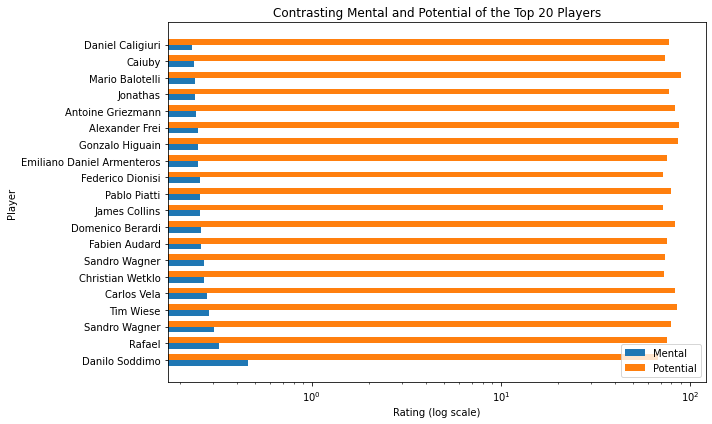

In [33]:
import matplotlib.pyplot as plt
import numpy as np

df1 = df.sort_values(by='Mental', ascending=False)

# Get the necessary data for plotting
player_names = df1['player_name'].head(20)
mental = df1['Mental'].head(20)
potentials = df1['potential'].head(20)

# Set the figure size
plt.figure(figsize=(10, 6))

# Set the bar width
bar_width = 0.35

# Create an array of indices for the x-axis ticks
x = np.arange(len(player_names))

# Plot the overall_rating bars
plt.barh(x, mental, height=bar_width, label='Mental')

# Plot the potential bars with an offset
plt.barh(x + bar_width, potentials, height=bar_width, label='Potential')

# Set y-axis to logarithmic scale
plt.xscale('log')

# Add labels and title to the plot
plt.ylabel('Player')
plt.xlabel('Rating (log scale)')
plt.title('Contrasting Mental and Potential of the Top 20 Players')
plt.yticks(x + bar_width/2, player_names)

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


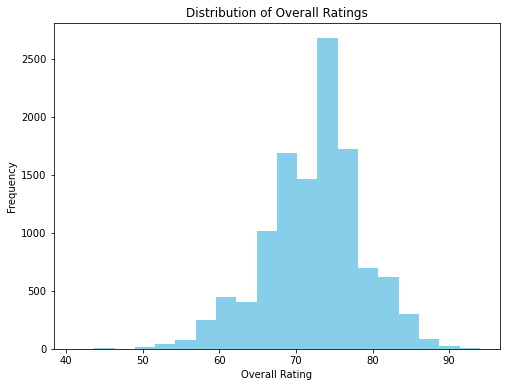

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(df['overall_rating'], bins=20, color='skyblue')
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Overall Ratings')
plt.show()


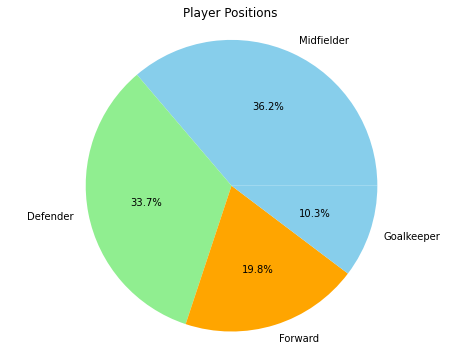

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
position_counts = df['position'].value_counts()
plt.pie(position_counts, labels=position_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'orange'])
plt.title('Player Positions')
plt.axis('equal')
plt.show()


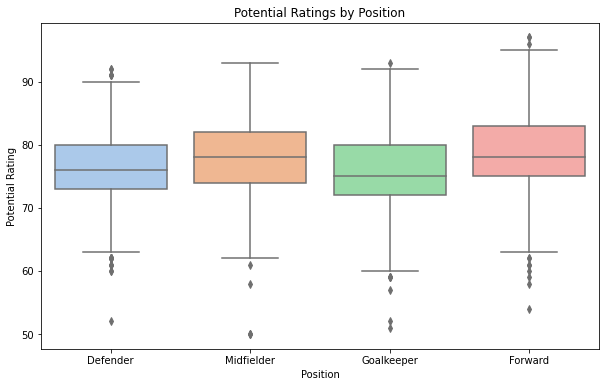

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='position', y='potential', palette='pastel')
plt.xlabel('Position')
plt.ylabel('Potential Rating')
plt.title('Potential Ratings by Position')
plt.show()



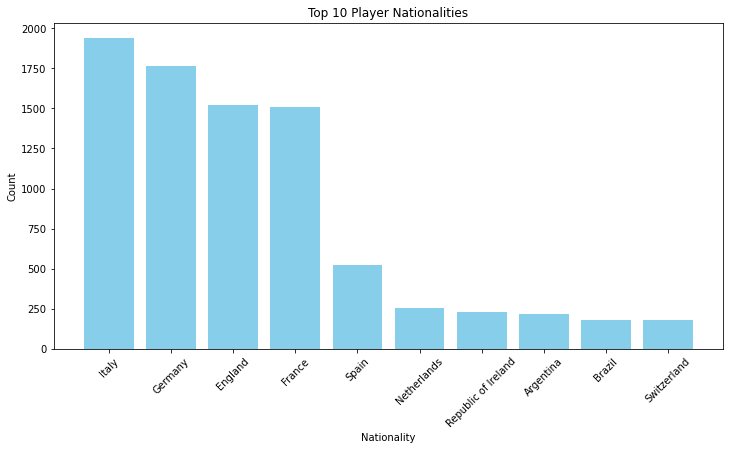

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
nationality_counts = df['nationality'].value_counts().head(10)
plt.bar(nationality_counts.index, nationality_counts.values, color='skyblue')
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.title('Top 10 Player Nationalities')
plt.xticks(rotation=45)
plt.show()


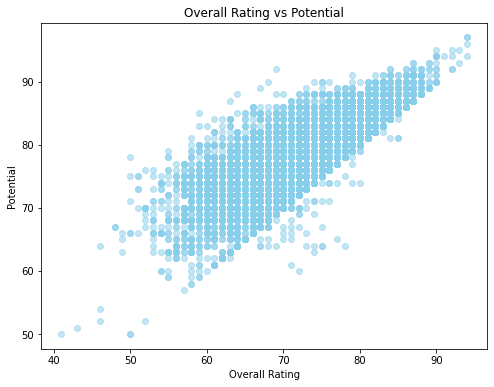

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df['overall_rating'], df['potential'], color='skyblue', alpha=0.5)
plt.xlabel('Overall Rating')
plt.ylabel('Potential')
plt.title('Overall Rating vs Potential')
plt.show()


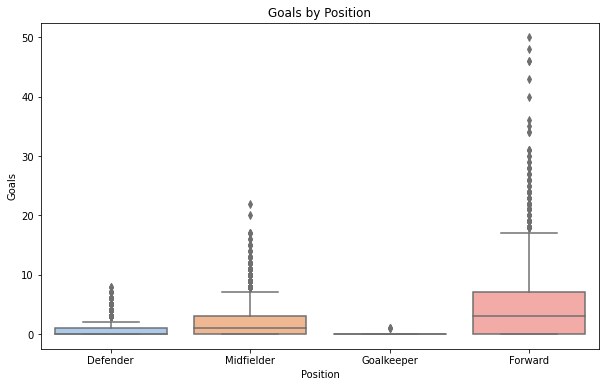

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='position', y='goals_overall', palette='pastel')
plt.xlabel('Position')
plt.ylabel('Goals')
plt.title('Goals by Position')
plt.show()

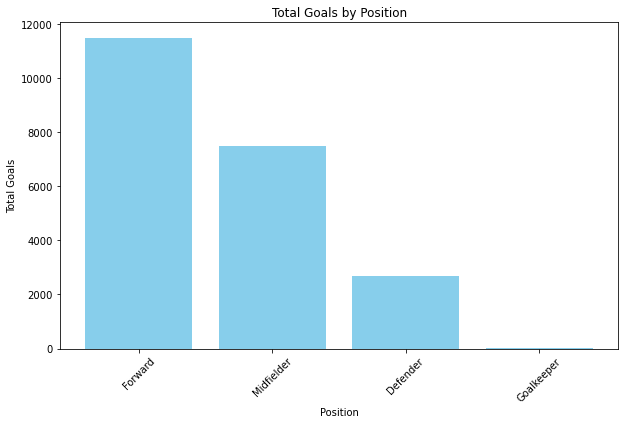

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
position_goals = df.groupby('position')['goals_overall'].sum().sort_values(ascending=False)
plt.bar(position_goals.index, position_goals.values, color='skyblue')
plt.xlabel('Position')
plt.ylabel('Total Goals')
plt.title('Total Goals by Position')
plt.xticks(rotation=45)
plt.show()


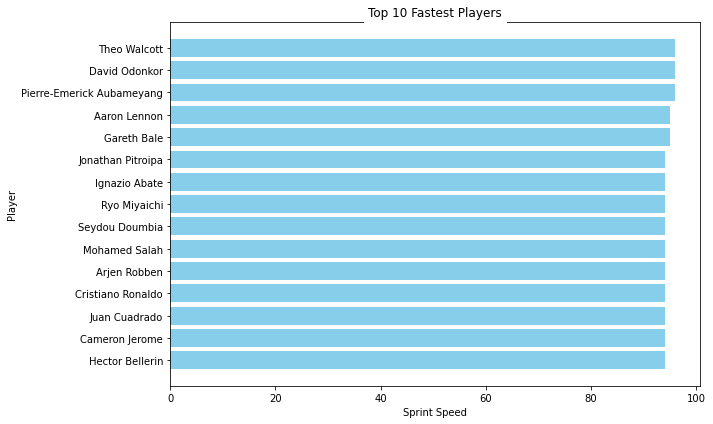

In [41]:
import matplotlib.pyplot as plt

# Sort the dataframe by sprint_speed in descending order and get the top 10 players
top_10_fastest_players = df.sort_values(by='sprint_speed', ascending=False).head(40)

# Extract player names and sprint speed values
player_names = top_10_fastest_players['player_name']
sprint_speeds = top_10_fastest_players['sprint_speed']

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a horizontal bar plot
plt.barh(player_names, sprint_speeds, color='skyblue')

# Add labels to the plot
plt.xlabel('Sprint Speed')
plt.ylabel('Player')

# Add a title with a transparent background for a cleaner look
plt.title('Top 10 Fastest Players', backgroundcolor='white')

# Invert the y-axis to display the players from top to bottom
plt.gca().invert_yaxis()

# Adjust the spacing between the bars
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
sorted_df = df[df['assists_overall'] > 0].sort_values('assists_overall', ascending=False)
sorted_df = sorted_df[['player_name', 'assists_overall', 'Age', 'season']]
sorted_df.head(10)

In [ ]:
sorted_df1 = df[df['goals_overall'] > 0].sort_values('goals_overall', ascending=False)
sorted_df1 = sorted_df1[['player_name', 'goals_overall', 'Age', 'season']]
sorted_df1.head(10)